## 파이썬 머신러닝
# 로지스틱 회귀 (Logistic Regression)

- 로지스틱 회귀는 이름과 다르게 **분류(Classification)** 알고리즘이다.
- 로지스틱 회귀는 각 클래스를 **직선** 또는 **평면** 으로 가른다.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

### 로지스틱회귀 맛보기

In [7]:
X = iris.data
y = iris.target

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
model.score(X, y)

0.96

In [10]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.96

### 속성을 2개로 제한

In [11]:
# sepal length 와 sepal width

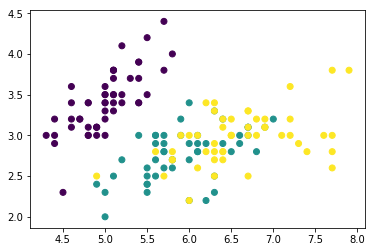

In [12]:
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)

In [13]:
X = iris.data[:,:2]
y = iris.target

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
model.score(X, y)

0.7666666666666667

In [16]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.7666666666666667

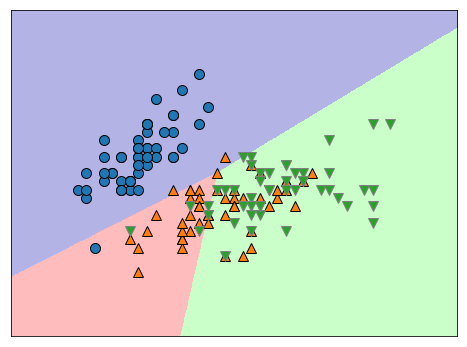

In [17]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 속성을 2개로 클래스도 2개로 제한

In [18]:
### sepal length/petal length, versicolor/virginica
X = iris.data[50:,[0,2]]
X.shape

(100, 2)

In [19]:
y = iris.target[50:]
y = np.where(y==1, 0, 1) # y = np.array([0]*50 + [1]*50)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

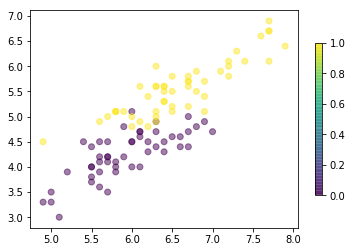

In [20]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.colorbar(shrink=0.7)

In [21]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
model.score(X, y)

0.91

In [23]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.91

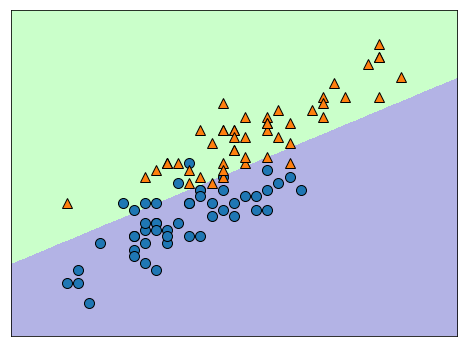

In [24]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [25]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve

### 옵션 C
- C 값이 클수록 칼 같이 자른다
- C 값이 작을수록 대강 자른다

In [42]:
model = LogisticRegression(C=100)
model.fit(X, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
model.score(X, y)

0.95

In [44]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.95

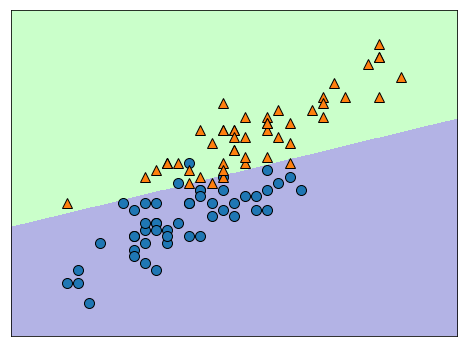

In [45]:
plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 로지스틱회귀의 원리 (신경망 관점)
- 선형회귀의 결과를 시그모이드(로지스틱)함수에 적용한다
- 시그모이드함수는 계단함수의 역할이다
- 최종 결과는 0~1 사이의 값을 가진다 (대부분은 0이나 1이 된다)

<img src="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/schematic.png">

<img src="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/sigmoid.png">

<br>(출처: https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html)

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [52]:
sigmoid(-5)

0.0066928509242848554

In [53]:
W = np.array([1,1]) # w1, w2
b = 0

pred_y = sigmoid(X@W + b) # 예측값
pred_y

array([0.99999171, 0.99998154, 0.9999925 , 0.99992515, 0.99998489,
       0.99996283, 0.9999833 , 0.99972542, 0.99998633, 0.99988835,
       0.99979657, 0.99995892, 0.9999546 , 0.9999796 , 0.99989897,
       0.99998489, 0.99995892, 0.99994983, 0.99997746, 0.99992515,
       0.99997746, 0.99995892, 0.99998633, 0.9999796 , 0.99997746,
       0.9999833 , 0.99999083, 0.99999171, 0.99997246, 0.99989897,
       0.99990858, 0.99989897, 0.99993872, 0.99998489, 0.99994983,
       0.99997246, 0.9999888 , 0.99997746, 0.99993872, 0.99992515,
       0.99994983, 0.99997746, 0.99994455, 0.99975154, 0.99994455,
       0.99994983, 0.99994983, 0.99997246, 0.99969655, 0.99994455,
       0.99999545, 0.99998154, 0.99999774, 0.99999321, 0.99999545,
       0.99999932, 0.99991728, 0.99999876, 0.99999627, 0.99999833,
       0.99999083, 0.99999171, 0.99999545, 0.99997746, 0.99998154,
       0.99999171, 0.99999386, 0.99999944, 0.99999954, 0.9999833 ,
       0.99999663, 0.99997246, 0.99999944, 0.99998633, 0.99999

In [54]:
X@W+b

array([11.7, 10.9, 11.8,  9.5, 11.1, 10.2, 11. ,  8.2, 11.2,  9.1,  8.5,
       10.1, 10. , 10.8,  9.2, 11.1, 10.1,  9.9, 10.7,  9.5, 10.7, 10.1,
       11.2, 10.8, 10.7, 11. , 11.6, 11.7, 10.5,  9.2,  9.3,  9.2,  9.7,
       11.1,  9.9, 10.5, 11.4, 10.7,  9.7,  9.5,  9.9, 10.7,  9.8,  8.3,
        9.8,  9.9,  9.9, 10.5,  8.1,  9.8, 12.3, 10.9, 13. , 11.9, 12.3,
       14.2,  9.4, 13.6, 12.5, 13.3, 11.6, 11.7, 12.3, 10.7, 10.9, 11.7,
       12. , 14.4, 14.6, 11. , 12.6, 10.5, 14.4, 11.2, 12.4, 13.2, 11. ,
       11. , 12. , 13. , 13.5, 14.3, 12. , 11.4, 11.7, 13.8, 11.9, 11.9,
       10.8, 12.3, 12.3, 12. , 10.9, 12.7, 12.4, 11.9, 11.3, 11.7, 11.6,
       11. ])

In [55]:
cost = ((pred_y - y)**2).mean() # MSE로 비용계산
cost

0.49994177807143036

In [59]:
W = np.array([1, 1]) # w1, w2
b = -0.1

pred_y = sigmoid(X@W + b)
cost = ((pred_y - y)**2).mean() # MSE
cost

0.499935656172912

In [61]:
w1=1
w2=1
b=0

pred_y = w1*X[:,0] + w2*X[:,1] + b

In [62]:
pred_y = sigmoid(pred_y)

In [63]:
cost = ((pred_y - y)**2).mean() # MSE
cost

0.49994177807143036

### 시그모이드함수 분석

In [77]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

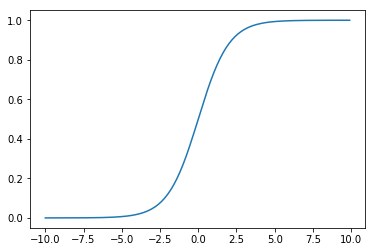

In [64]:
x = np.arange(-10,10,0.1)
plt.plot(x, sigmoid(x))

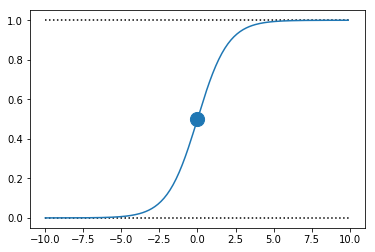

In [82]:
x = np.arange(-10,10,0.1)
plt.hlines([0,1], -10,10, linestyles=':')
plt.plot(x, sigmoid(x))
plt.scatter([0],[0.5], s=200)

- 최종출력값이 0.3 이라면, 0.5를 기준으로 해서 레이블-0 으로 판별한다
- 최종출력값이 0.3 이라면, 레이블-1 이 될 확률이 0.3, 레이블-0이 될 확률이 0.7로 해석할 수 있다
- 결과적으로 시그모이드함수의 출력값을 **확률**로 해석할 수 있다

### 가중치 분석

In [65]:
### sepal length/pepal length, versicolor/virginica
X = iris.data[50:,[0,2]]
X.shape

(100, 2)

In [66]:
y = iris.target[50:]
y = np.where(y==1, 0, 1) # y = np.array([0]*50 + [1]*50)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [67]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
model.coef_, model.intercept_

(array([[-2.22916226,  3.19217353]]), array([-1.61383101]))

In [84]:
w1, w2 = model.coef_[0]
b = model.intercept_[0]

w1, w2, b

(-0.6413354060178963, 0.9092564588403724, -0.3131901206112607)

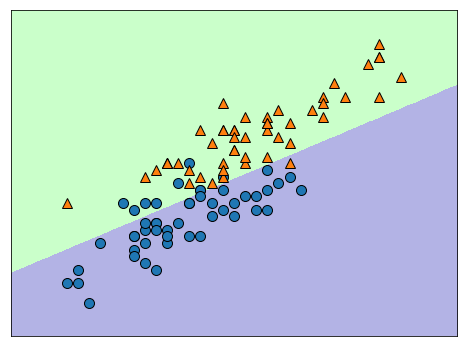

In [86]:
plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

<img src="https://plot.ly/~florianh/149.png">
<br>(출처: https://florianhartl.com/logistic-regression-geometric-intuition.html)

<img src="https://dpzbhybb2pdcj.cloudfront.net/orland/v-11/Figures/15image015.png">
<br>(출처: https://livebook.manning.com/book/math-for-programmers/chapter-15/v-11/131)

- 평면방정식
> z = ax + by + c

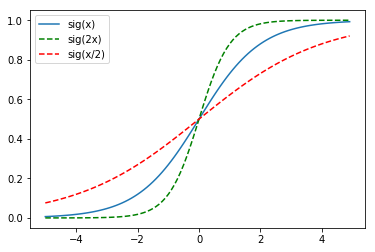

In [69]:
rng = np.arange(-5, 5, 0.1)
plt.plot(rng, sigmoid(rng))
plt.plot(rng, sigmoid(2*rng), 'g--')
plt.plot(rng, sigmoid(0.5*rng), 'r--')
plt.legend(['sig(x)', 'sig(2x)', 'sig(x/2)'])

Text(0.5,0,'target')

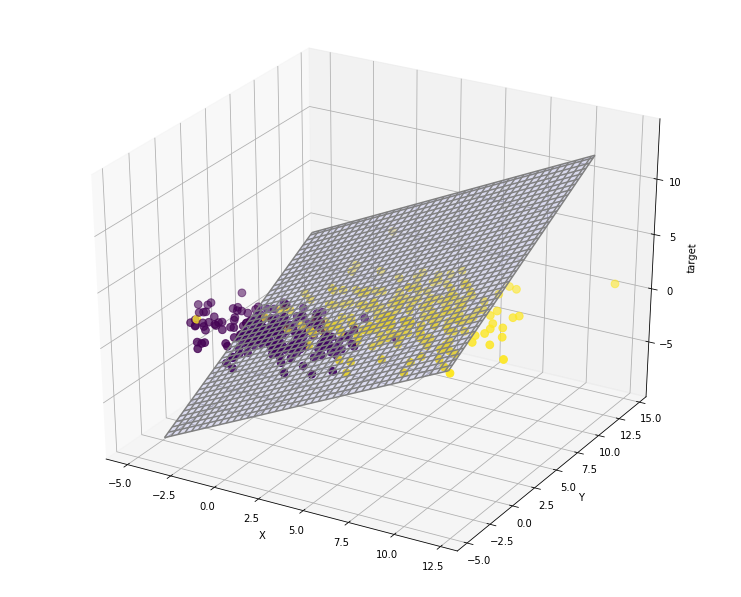

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                shade=True, alpha=0.1, color='b')
ax.plot_wireframe(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

#ax.view_init(60, 70)

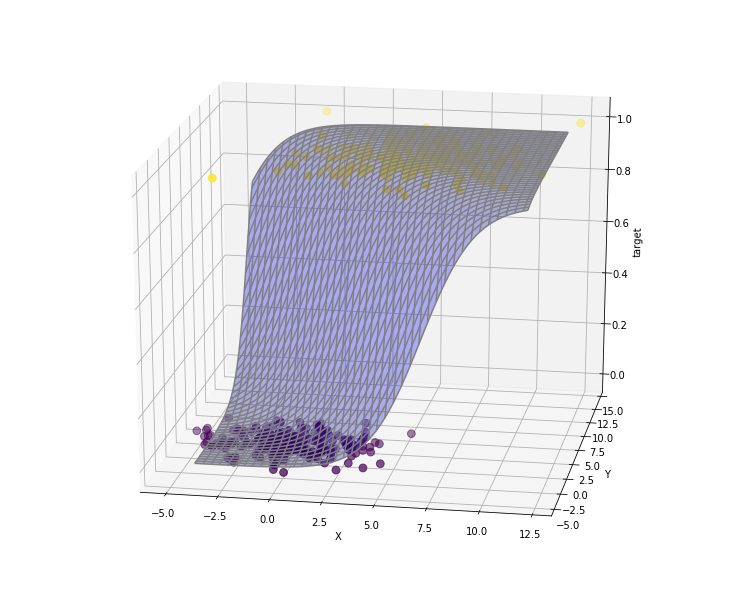

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                shade=True, alpha=0.3, color='b')
ax.plot_wireframe(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

ax.view_init(20, -80)